In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Focus is to understand the final data structure
* support each step by visual analytics

git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [2]:
data_path = '../data/raw/COVID-19/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [4]:
time_idx  = pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
7/21/22    30239122
7/22/22    30331131
7/23/22    30331133
7/24/22    30331133
7/25/22    30476605
Length: 916, dtype: int64

In [8]:
country_list = ['Italy','US','Spain','Germany','Korea, South']

In [9]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

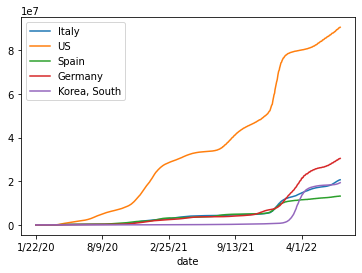

In [10]:
df_plot.set_index('date').plot()

### Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #Converting to datetime object
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # Convert back to date ISO norm (str)

In [13]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index = False)

## Relational Data Model
using Primary Key 

In [16]:
data_path = '../data/raw/COVID-19/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [17]:
pd_data_base= pd_raw.rename(columns = {'Country/Region':'country', 'Province/State':'state'})

In [18]:
pd_data_base = pd_data_base.drop(['Lat','Long'], axis = 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,183445,183572,183687,183908,184038,184224,184360,184473,184587,184819
1,NaN,Albania,0,0,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,266424,266445,266487,266542,266591,266654,266700,266772,266839,266916
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,45061,45061,45061,45326,45326,45326,45326,45326
4,NaN,Angola,0,0,0,0,0,0,0,0,...,101901,101901,102209,102209,102209,102209,102301,102301,102301,102301


In [19]:
test_pd = pd_data_base.set_index(['state','country']).T
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [20]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
261055,7/25/22,Western Australia,Australia,1042577.0
261056,7/25/22,Xinjiang,China,1008.0
261057,7/25/22,Yukon,Canada,4610.0
261058,7/25/22,Yunnan,China,2205.0


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [22]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [24]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [25]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index = False)

## Group-by apply

In [26]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data = pd_JH_data.sort_values('date', ascending=True).reset_index(drop=True).copy()
pd_JH_data

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,NaN,US,1.0
2,2020-01-22,NaN,Uganda,0.0
3,2020-01-22,NaN,Ukraine,0.0
4,2020-01-22,NaN,United Arab Emirates,0.0
...,...,...,...,...
261055,2022-07-25,NaN,Kosovo,245857.0
261056,2022-07-25,NaN,"Korea, South",19346764.0
261057,2022-07-25,NaN,"Korea, North",1.0
261058,2022-07-25,NaN,Latvia,855249.0


In [27]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [28]:
test_data['state']=test_data['state'].fillna('no')
test_data

C:\Users\ashut\AppData\Local\Temp\ipykernel_21064\1681806567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['state']=test_data['state'].fillna('no')


,date,state,country,confirmed
16825,2020-03-21,no,US,26025.0
16980,2020-03-21,no,Germany,16662.0
17112,2020-03-22,no,US,34944.0
17265,2020-03-22,no,Germany,18610.0
17396,2020-03-23,no,US,46096.0
...,...,...,...,...
260371,2022-07-23,no,Germany,30331133.0
260501,2022-07-24,no,US,90410386.0
260655,2022-07-24,no,Germany,30331133.0
260786,2022-07-25,no,US,90567290.0


In [29]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2022-07-25,no,30476605.0
US,2022-07-25,no,90567290.0


In [30]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''
    
#     y = np.array(in_array['confirmed'])
#     X = np.arange(len(y)).reshape(-1, 1)
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

In [31]:
test_data.groupby(['state','country']).agg(np.max)

date   confirmed
state country                       
no    Germany 2022-07-25  30476605.0
      US      2022-07-25  90567290.0

In [32]:
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

AssertionError: 

In [ ]:
# %load ../src/features/build_features.py

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'
        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result

In [ ]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [ ]:
test_data

## Filtering the data with groupby apply

In [ ]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [ ]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()
pd_DR_result

In [ ]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

In [ ]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

In [ ]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.head()

In [ ]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

## Filtered dubling Rate

In [ ]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.head()

In [ ]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.head()

In [ ]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 

In [ ]:
pd_result_larg[pd_result_larg['country']=='Germany'].head()

In [ ]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)